In [1]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('data/DataminingContest2009.Task2.Train.Inputs')
target = np.loadtxt('data/DataminingContest2009.Task2.Train.Targets')

In [3]:
df.head()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1


In [4]:
df['fraud'] = target
df.rename(columns={'0':'fraud','custAttr1':'id#', 'custAttr2':'email'}, inplace=True)
df.head()

,amount,hour1,state1,zip1,id#,field1,email,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1,0.0
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1,0.0
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1,0.0
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1,0.0
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1,0.0


### CHECK FOR NANS

In [5]:
df.isna().sum()

amount        0
hour1         0
state1        1
zip1          0
id#           0
field1        0
email         0
field2        0
hour2         0
flag1         0
total         0
field3        0
field4        0
indicator1    0
indicator2    0
flag2         0
flag3         0
flag4         0
flag5         0
fraud         0
dtype: int64

In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
df.describe()

,amount,hour1,zip1,id#,field1,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
count,99999.000000,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.000000
mean,26.976350,14.015990,544.312693,1.234568e+15,2.368264,0.405384,14.030470,0.419714,26.976350,368.768418,15.026190,0.113361,0.017850,0.556396,0.391404,0.013730,16.03750,0.026540
std,14.594911,5.415109,317.283645,2.140173e+04,0.998771,0.490969,5.409437,0.493515,14.594911,4151.215917,6.450291,0.317035,0.132407,0.496812,0.488067,0.116369,191.19551,0.160736
min,0.000000,0.000000,6.000000,1.234568e+15,0.000000,0.000000,0.000000,0.000000,0.000000,-26803.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,12.950000,11.000000,279.000000,1.234568e+15,2.000000,0.000000,11.000000,0.000000,12.950000,-2260.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
50%,25.900000,14.000000,535.000000,1.234568e+15,3.000000,0.000000,14.000000,0.000000,25.900000,1093.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000
75%,38.850000,18.000000,891.000000,1.234568e+15,3.000000,1.000000,18.000000,1.000000,38.850000,3517.500000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000
max,59.950000,23.000000,999.000000,1.234568e+15,4.000000,1.000000,23.000000,1.000000,59.950000,8169.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3278.00000,1.000000


##### Right off the bat it looks like there were purchases entered as $0 -- these will likely need to be deleted, presumably owing to input error who knows what our flags and indicators are but my suspicion is that indicator2 and flag4 have stronger correlation with fraud as their means are closest. We'll find out later!

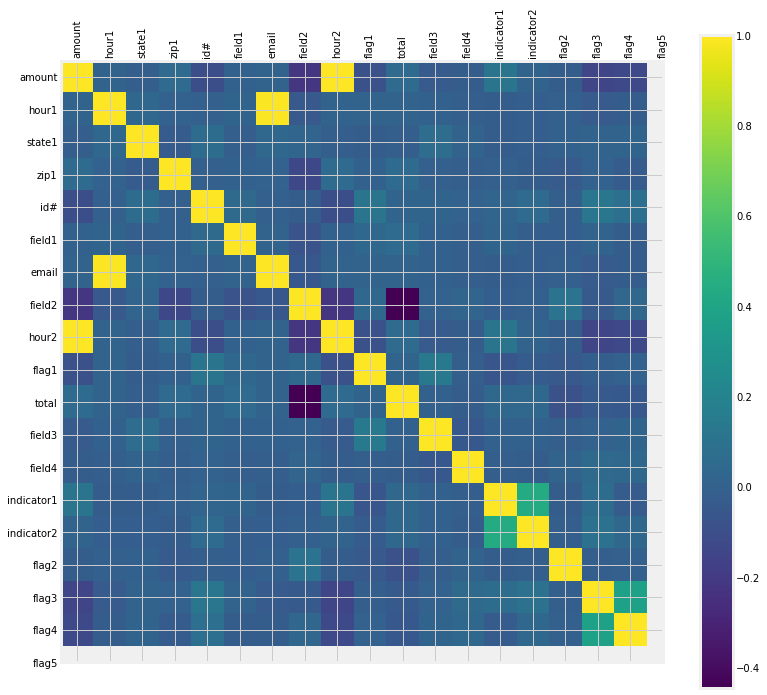

In [8]:
#LOOK AT CORRELATION
columns=df.columns[:-1]
fig, ax = plt.subplots(figsize=(12, 12))
corr_map = ax.matshow(df.corr())
ax.set_xticks(range(len(columns)))
ax.set_yticks(range(len(columns)))
ax.set_xticklabels(columns, rotation=90)
ax.set_yticklabels(columns)
cb = fig.colorbar(corr_map, ax=ax);

#### Looks like 'total' can be dropped

In [9]:
df[df.amount != df.total]

,amount,hour1,state1,zip1,id#,field1,email,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud


In [10]:
df.pop('total')

0        12.95
1        38.85
2        38.85
3        12.95
4        38.85
         ...  
99994    31.08
99995    49.95
99996    11.01
99997    12.95
99998    12.95
Name: total, Length: 99999, dtype: float64

### Two hour columns?? Seems shady. Let's explore.

In [11]:
df[df['hour1'] != df['hour2']]

,amount,hour1,state1,zip1,id#,field1,email,field2,hour2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud
76,38.85,7,OH,454,1234567890123525,3,brtjtphsbisqb@paradigmasset.com,0,8,0,-3166,8,0,0,1,1,0,2,0.0
109,34.97,8,VA,201,1234567890123557,3,mqbomhkvofshy@lycos.com,0,9,1,-1965,7,0,0,0,0,0,1,0.0
483,12.95,16,TX,761,1234567890123892,3,dvirbnkgkitlk2@aol.com,1,15,0,1065,15,0,0,1,1,0,1,0.0
485,49.95,16,GA,303,1234567890123893,2,vqzakxmdkigem@bellsouth.net,1,15,0,-6674,21,0,0,0,0,0,1,0.0
527,38.85,16,IN,474,1234567890123932,3,wjhmtjmxmskmp17@yahoo.com,1,17,0,2925,20,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99620,38.85,9,AL,357,1234567890161728,3,atgthpjcjcoww@ngc.com,1,10,1,4063,8,0,0,1,0,0,1,0.0
99760,49.95,12,AZ,852,1234567890197026,3,phpqriqrmubjz@hotmail.com,0,11,0,3926,9,1,0,1,1,0,2,0.0
99838,38.85,12,CA,941,1234567890197084,3,vtajtzawnxucb@yahoo.com,0,13,1,114,8,0,0,1,1,0,1,0.0
99842,38.85,12,FL,331,1234567890197087,2,yommholfyihtn99@aol.com,1,13,0,-4629,16,1,0,1,1,0,1,0.0


In [12]:
hour_diffs = abs(df[df.hour1 != df.hour2]['hour1'] - df[df.hour1 != df.hour2]['hour2'])
hour_diffs.describe()

count    2207.000000
mean        1.628455
std         3.664372
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        23.000000
dtype: float64

In [13]:
### IT LOOKS LIKE THIS IS A FUNCTION OF WHEN THE TRANSACTION TOOK PLACE & WHEN IT PROCESSED. 
### IF THIS WERE IN MINUTES & SECONDS, I WOULD KEEP BOTH, BUT THE AMBIGUITY WON'T LIKELY BE DOING ANYTHING FOR US
### LET'S DROP HOUR2
df.pop('hour2')
df = df.rename(columns={'hour1':'hour'})

### Fraud by state

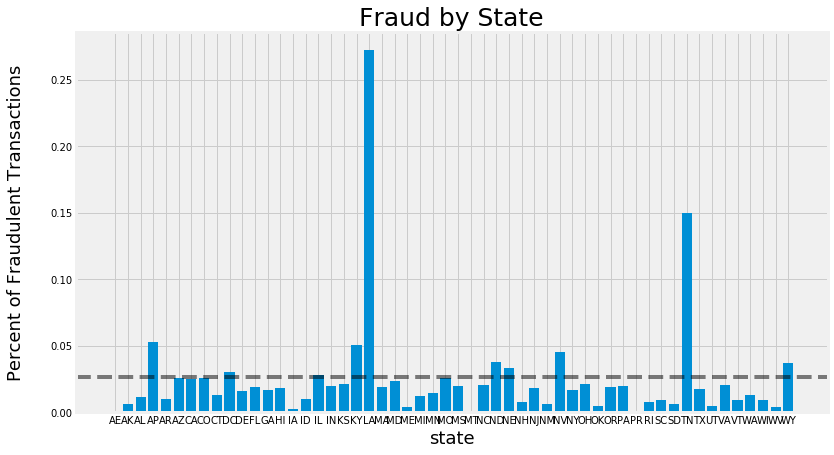

In [14]:
fig, ax = plt.subplots(figsize=(12, 7))
likes = df.groupby('state1').fraud.mean()
ax.set_title('Fraud by State', fontsize=25)
ax.set_xlabel('state', fontsize=18)
ax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.bar(likes.index, likes)
fig.savefig('visuals/fraudbystate.png')

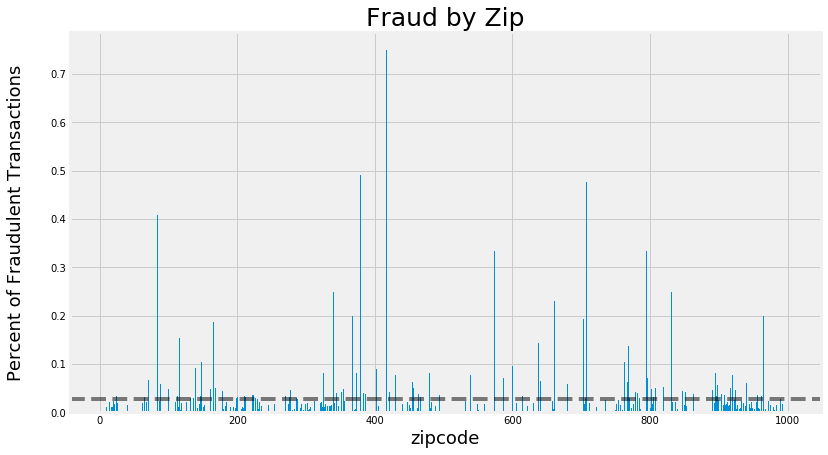

In [15]:
fig, ax = plt.subplots(figsize=(12, 7))
likes = df.groupby('zip1').fraud.mean()
ax.set_title('Fraud by Zip', fontsize=25)
ax.set_xlabel('zipcode', fontsize=18)
ax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.bar(likes.index, likes)
fig.savefig('visuals/fraudbyzip.png')

#### These seem to be aligned enough & zip seems to have stronger outliers so we'll drop state (*I am not confident in this conclusion though)

In [16]:
df.pop('state1')

0        WA
1        WA
2        KY
3        CA
4        GA
         ..
99994    GA
99995    LA
99996    NY
99997    VA
99998    TN
Name: state1, Length: 99999, dtype: object

<BarContainer object of 24 artists>

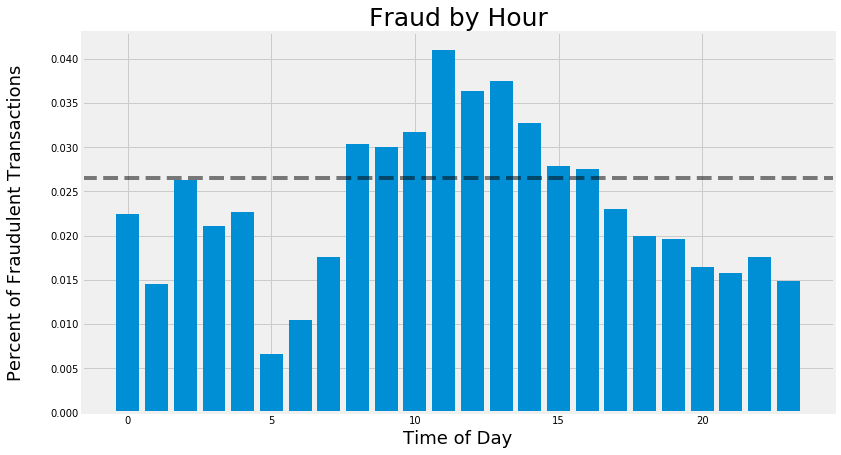

In [17]:
fig, ax = plt.subplots(figsize=(12, 7))
likes = df.groupby('hour').fraud.mean()
ax.set_title('Fraud by Hour', fontsize=25)
ax.set_xlabel('Time of Day', fontsize=18)
ax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.bar(likes.index, likes)
#fig.savefig('visuals/fraudbyhour.png')

<BarContainer object of 24 artists>

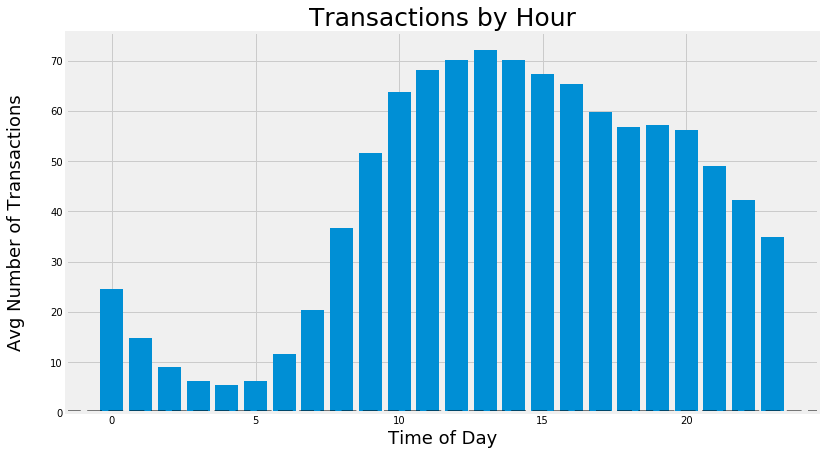

In [18]:
fig, ax = plt.subplots(figsize=(12, 7))
likes = df.hour.value_counts() / 98
ax.set_title('Transactions by Hour', fontsize=25)
ax.set_xlabel('Time of Day', fontsize=18)
ax.set_ylabel('Avg Number of Transactions', fontsize=18, labelpad=25)
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.bar(likes.index, likes)
#fig.savefig('visuals/transactionsbyhour.png')

### Now let's look at email

In [19]:
e_dict = defaultdict()
email_counts = df.email.value_counts()
for count in set(email_counts):
    e_mask = email_counts[email_counts==count].index
    fraud_rate = df[df.email.isin(e_mask)].fraud.mean()
    e_dict[count] = fraud_rate

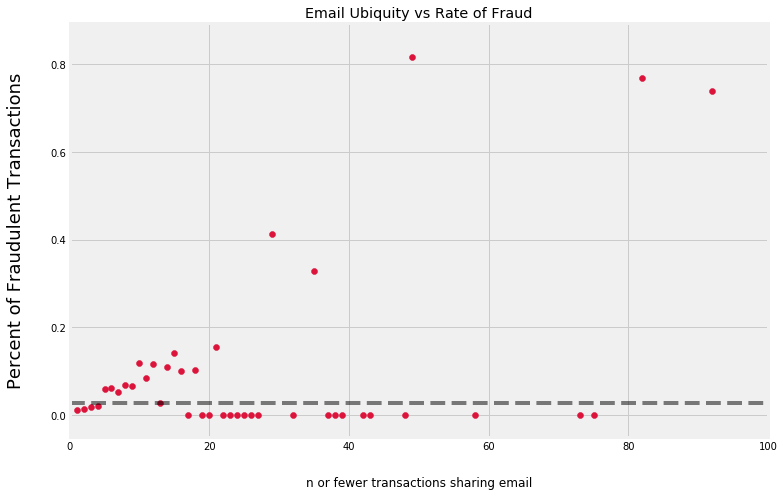

In [20]:
emails = np.array(sorted(e_dict.items()))
fig, ax = plt.subplots(figsize=(11,7))
ax.scatter(emails[:,0], emails[:,1], c='crimson')
ax.set_title('Email Ubiquity vs Rate of Fraud')
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.set_xlim([0, 100])
ax.set_xlabel('n or fewer transactions sharing email', labelpad=25)
ax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)
plt.tight_layout()
#fig.savefig('visuals/emailuniqueness.png');

In [21]:
df.email.value_counts().sort_values(ascending=False)[:15]

zwzihwgzxohnq@cbbtr.com           262
antihyknzxmva@choicedata.com      247
pugrmyvovmvyp@cbbtr.com           172
ixhkuerllitft@clintmiller.com      92
zsxbringavcae@cbbtr.com            82
nwufbdovzievu@aol.com              75
iyjaybrnmdlao@comcast.net          73
oqrlcjgbdsvlu2@hotmail.com         58
qcosrkuucvhwq@cbbtr.com            49
kwvgwyeuuvjuk@msn.com              48
ddudfpzitznuw216@earthlink.net     48
crtxdwiruubzk@adelphia.net         43
rqesnoyhixdns10051@yahoo.com       42
ynozmyepftucq@wellsfargo.com       39
uxwmulsoaqxlj588@aol.com           38
Name: email, dtype: int64

In [22]:
domains = df.email.apply(lambda s: s.split('@')[-1])
df['domain'] = domains

In [23]:
domain_dict = defaultdict()
domain_counts = df.domain.value_counts()
for count in set(domain_counts):
    domain_mask = domain_counts[domain_counts==count].index
    domain_fraud_rate = df[df.domain.isin(domain_mask)].fraud.mean()
    domain_dict[count] = domain_fraud_rate

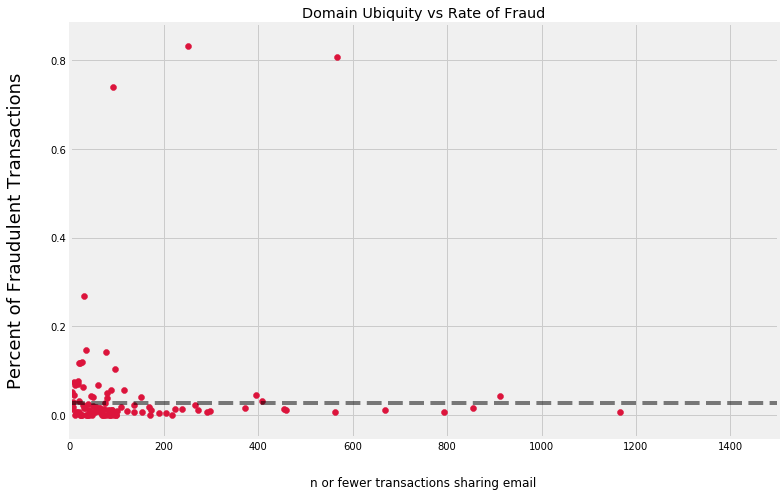

In [24]:
ids = np.array(sorted(domain_dict.items()))
fig, ax = plt.subplots(figsize=(11,7))
ax.scatter(ids[:,0], ids[:,1], c='crimson')
ax.set_title('Domain Ubiquity vs Rate of Fraud')
ax.axhline(df.fraud.mean(), color='k', linestyle='--', alpha=.5)
ax.set_xlim([0, 1500])
ax.set_xlabel('n or fewer transactions sharing email', labelpad=25)
ax.set_ylabel('Percent of Fraudulent Transactions', fontsize=18, labelpad=25)
plt.tight_layout()
#fig.savefig('visuals/domainuniqueness.png');

In [25]:
multiple_emails = df.groupby('id#')['email'].nunique().sort_values(ascending=False)
multiple_emails = multiple_emails[multiple_emails > 1]
df[df['id#'].isin(multiple_emails.index)].sort_values(by='id#')

,amount,hour,zip1,id#,field1,email,field2,flag1,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5,fraud,domain
19,12.95,1,601,1234567890123474,2,ivfkccnfbcoro1@yahoo.com,0,1,809,7,0,0,0,0,0,1,0.0,yahoo.com
586,12.95,18,601,1234567890123474,2,hdihaltwaizjz0455@aol.com,1,1,-3328,10,0,0,0,0,0,1,0.0,aol.com
56,49.95,7,378,1234567890123509,3,cugibnyssmsir2@charter.net,1,0,-5894,17,0,0,1,0,0,1,0.0,charter.net
114,12.95,9,378,1234567890123509,3,nqloacvnobptr@charter.net,0,0,-6184,18,0,0,0,0,0,1,0.0,charter.net
78,38.85,8,89,1234567890123528,3,hvvlqrrsqistw@us.army.mil,1,0,7090,12,0,0,1,0,0,1,0.0,us.army.mil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99883,34.97,13,140,1234567890197088,2,ymfszultzjkrk@earthlink.net,1,1,-83,20,0,0,0,0,0,1,0.0,earthlink.net
99918,38.85,13,805,1234567890197127,3,bbdxphwsnjasv@aol.com,1,0,4634,23,0,0,1,1,0,1,0.0,aol.com
99973,38.85,14,805,1234567890197127,3,nuoqjiudsggmx@aol.com,0,0,3841,16,0,0,1,1,0,1,0.0,aol.com
99937,12.95,14,281,1234567890197140,0,mjthgwypszktc@carolina.rr.com,0,0,-96,24,0,0,1,0,0,1,0.0,carolina.rr.com


In [26]:
#### PERCENT OF FRAUD CASES IN THIS GROUP
df[df['id#'].isin(multiple_emails.index)].fraud.mean()

0.035303776683087026

In [28]:
### AS WITH THE 2 HOURS COLUMNS, THERE'S PROBABLY TOO MUCH GRAY AREA HERE
### SOME ACCOUNTS MAY BE ACCESSIBLE TO MULTIPLE PEOPLE
### PERHAPS A FRAUDSTER ACCIDENTALLY GAVE THE WRONG EMAIL
### SINCE <90% OF ACCOUNTS ONLY HAVE 1 EMAIL (AND ACCOUNT ID WILL BE EASIER TO WORK WITH IN OUR MODELS) WE'LL DROP IT
df.drop(columns=['email','domain'], inplace=True)

#### LET's SEE WHAT's UP WITH THESE DIFFERENT FIELDS!

In [29]:
def simple_fields(df, field):
    d = defaultdict(list)
    categories = df[field].unique()
    for cat in categories:
        fm = df[df[field] == cat].fraud.mean()
        count = df[df[field] == cat].shape[0]
        if fm  == 0:
            d['legal'].append({cat:count})
        else:
            d['fraud'].append({cat:(round(fm, 5), count)})
    
    print (field)
    print ('FRAUD | Category : (fraud%, group size)')
    print (d['fraud']) 
    print ('LEGAL | Category : group size')
    print (d['legal'])
    return

In [30]:
fields = ['field1', 'field2', 'flag1', 'field4', 'indicator1', 'indicator2',
          'flag2', 'flag3', 'flag4', 'flag5']
#field3 is very messy so let's not for for now
for f in fields:
    simple_fields(df, f)
    print ('')

field1
FRAUD | Category : (fraud%, group size)
[{0: (0.02094, 11177)}, {3: (0.01953, 58160)}, {2: (0.01592, 25949)}, {1: (0.01285, 2802)}, {4: (0.43694, 1911)}]
LEGAL | Category : group size
[]

field2
FRAUD | Category : (fraud%, group size)
[{0: (0.02867, 59461)}, {1: (0.02341, 40538)}]
LEGAL | Category : group size
[]

flag1
FRAUD | Category : (fraud%, group size)
[{0: (0.02213, 58028)}, {1: (0.03264, 41971)}]
LEGAL | Category : group size
[]

field4
FRAUD | Category : (fraud%, group size)
[{19: (0.01593, 5272)}, {14: (0.05301, 2528)}, {23: (0.01344, 3645)}, {31: (0.0495, 202)}, {21: (0.01323, 5139)}, {24: (0.01252, 2956)}, {7: (0.03616, 7191)}, {9: (0.03487, 10067)}, {6: (0.02283, 5431)}, {10: (0.03553, 5545)}, {25: (0.01773, 2143)}, {17: (0.02059, 4905)}, {18: (0.01791, 6085)}, {16: (0.01739, 4198)}, {11: (0.05464, 3477)}, {20: (0.01446, 5600)}, {8: (0.02837, 8602)}, {22: (0.01786, 4704)}, {26: (0.00925, 1513)}, {32: (0.04459, 157)}, {29: (0.01431, 559)}, {13: (0.06551, 2015)}, {12

### Looks like we should OHE some of these categories

In [31]:
def create_dummy_df(df, features):
    out = df.copy()
    for feature in features:
        dummies = pd.get_dummies(out[feature], prefix=feature)
        out = out.drop(columns=feature).join(dummies.iloc[:,:-1])
    return out

In [32]:
df = create_dummy_df(df, ['field1','field4', 'flag5'])

In [33]:
#Save the Data for Modeling
df.to_csv('Task2data.csv')